In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [4]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [10]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [11]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [12]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [13]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [14]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

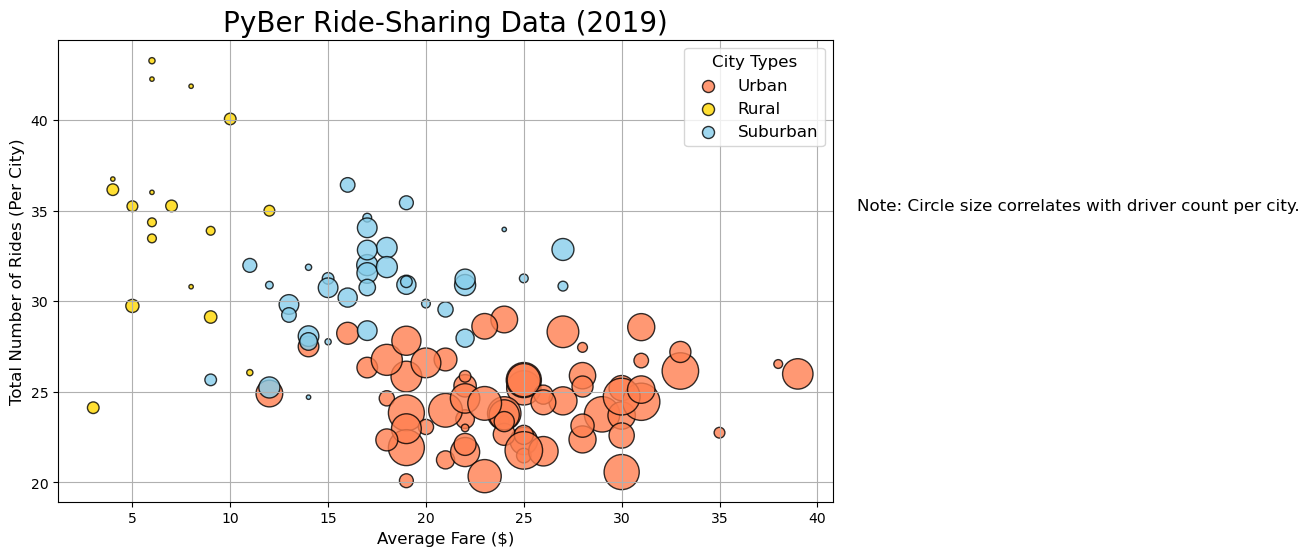

In [15]:
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, 
            c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, 
            c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, 
            c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Average Fare ($)", fontsize=12)
plt.ylabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize=12)
# Save the figure
plt.savefig("Analysis/Fig1.png")
plt.show()

In [16]:
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [17]:
urban_fares = urban_cities_df["fare"]
mean_urban_fares = np.mean(urban_fares)
median_urban_fares = np.median(urban_fares)
mode_urban_fares = sts.mode(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [18]:
suburban_fares = suburban_cities_df["fare"]
mean_suburban_fares = np.mean(suburban_fares)
median_suburban_fares = np.median(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")
print(f"The mode fare price for urban trips is ${mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [19]:
rural_fares = rural_cities_df["fare"]
mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")
print(f"The mode fare price for urban trips is ${mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [20]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']


In [21]:
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mean number of drivers for urban cities is {mean_urban_drivers:.2f}.")
print(f"The median number of drivers for urban cities is {median_urban_drivers}.")
print(f"The mode number of drivers for urban cities is {mode_urban_drivers}.")
print(sum(urban_driver_count))

The mean number of drivers for urban cities is 36.68.
The median number of drivers for urban cities is 37.0.
The mode number of drivers for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).
2405.0


In [21]:
mean_suburban_drivers = round(np.mean(suburban_drivers), 0)
median_suburban_drivers = round(np.median(suburban_drivers), 0)
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mean number of drivers for suburban cities is {mean_suburban_drivers:.2f}.")
print(f"The median number of drivers for suburban cities is {median_suburban_drivers}.")
print(f"The mode number of drivers for suburban cities is {mode_suburban_drivers}.")

The mean number of drivers for suburban cities is 14.00.
The median number of drivers for suburban cities is 16.0.
The mode number of drivers for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [22]:
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mean number of drivers for rural cities is {mean_rural_drivers:.2f}.")
print(f"The median number of drivers for rural cities is {median_rural_drivers}.")
print(f"The mode number of drivers for rural cities is {mode_rural_drivers}.")

The mean number of drivers for rural cities is 4.30.
The median number of drivers for rural cities is 4.0.
The mode number of drivers for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


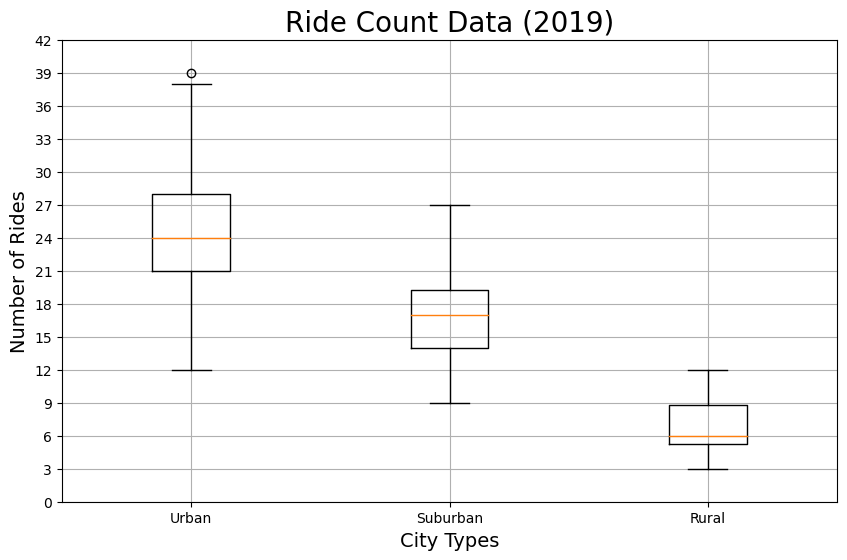

In [23]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.savefig("Analysis/Fig2.png")
plt.show()

In [24]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


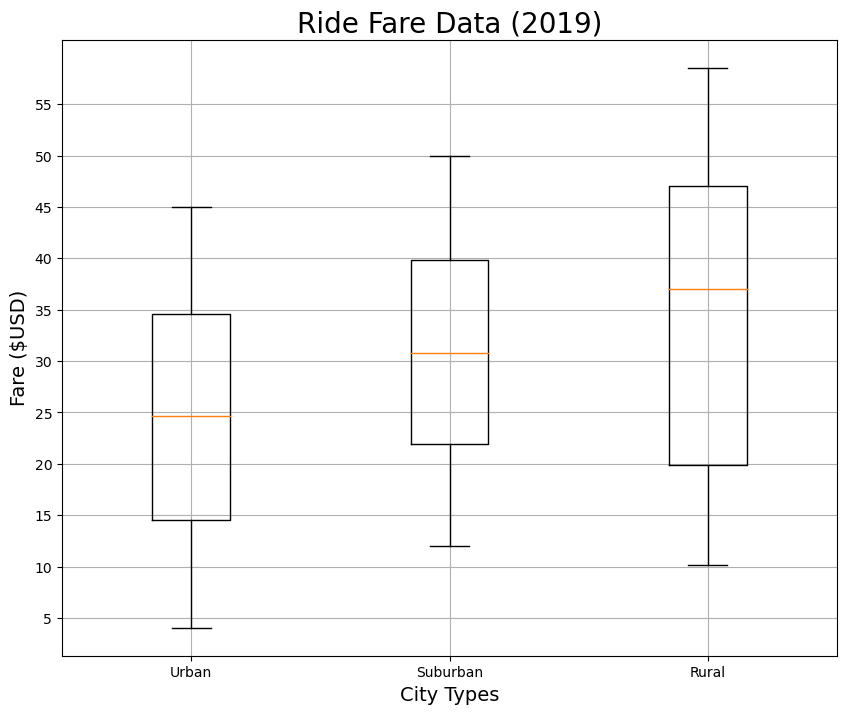

In [25]:
# Create a box-and-whisker plot for the urban fare data, then all city types fare data
avg_fare_box_plot = [urban_fares, suburban_fares, rural_fares]
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.boxplot(avg_fare_box_plot, labels=x_labels)
ax.grid()
plt.savefig("Analysis/Fig3.png")
plt.show()

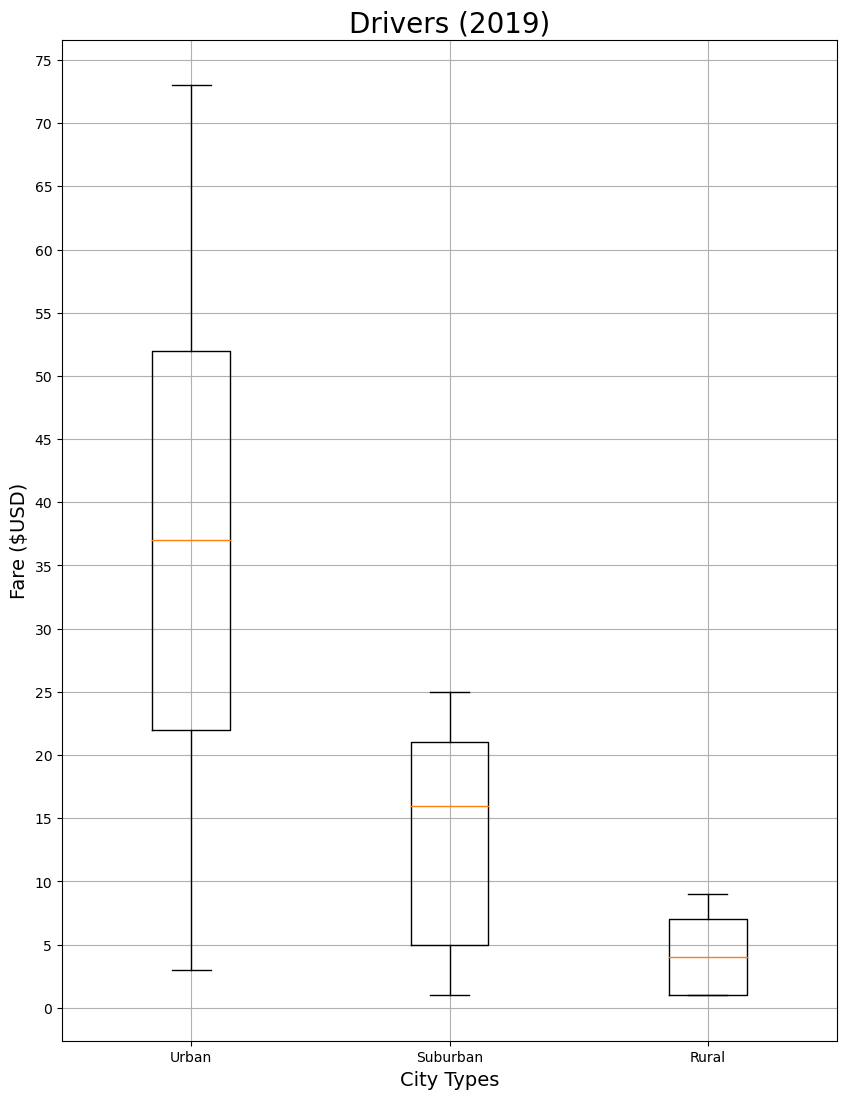

In [26]:
# Create a box-and-whisker plot for the urban fare data, then all city types fare data
drivers_box_plot = [urban_drivers, suburban_drivers, rural_drivers]
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots(figsize=(10, 13))
ax.set_title('Drivers (2019)', fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_yticks(np.arange(0, 85, step=5.0))
ax.boxplot(drivers_box_plot, labels=x_labels)
ax.grid()
plt.savefig("Analysis/Fig4.png")
plt.show()

In [27]:

type_percentages = round(100*(pyber_data_df.groupby(['type']).sum()['fare'])/(pyber_data_df['fare'].sum()), 2)
type_percentages


type
Rural        6.81
Suburban    30.46
Urban       62.72
Name: fare, dtype: float64

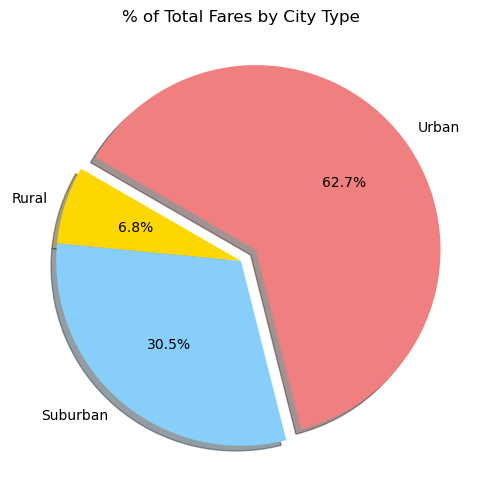

In [28]:
plt.subplots(figsize=(10, 6))
plt.pie(type_percentages, labels=['Rural', 'Suburban', 'Urban'], colors=['gold', 'lightskyblue','lightcoral'],
        explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Fares by City Type") 
mpl.rcParams['font.size'] = 14
plt.savefig("Analysis/Fig5.png")
plt.show()

In [29]:
ride_percentages = round(100 * (pyber_data_df.groupby(['type'])['city'].count())/(pyber_data_df['type'].count()), 2)
ride_percentages

type
Rural        5.26
Suburban    26.32
Urban       68.42
Name: city, dtype: float64

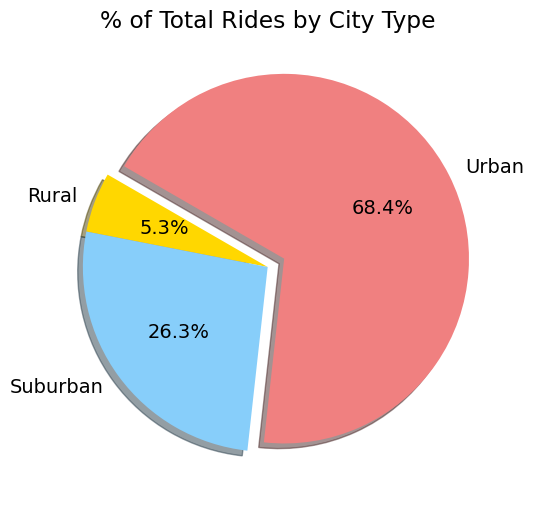

In [30]:
plt.subplots(figsize=(10, 6))
plt.pie(ride_percentages, labels=['Rural', 'Suburban', 'Urban'], colors=['gold', 'lightskyblue','lightcoral'],
        explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Rides by City Type") 
mpl.rcParams['font.size'] = 14
plt.savefig("Analysis/Fig6.png")
plt.show()

In [31]:
driver_total_percentage = round(100 * (city_data_df.groupby(['type']).sum()['driver_count'])/(city_data_df['driver_count'].sum()), 1)
driver_total_percentage

type
Rural        2.6
Suburban    16.5
Urban       80.9
Name: driver_count, dtype: float64

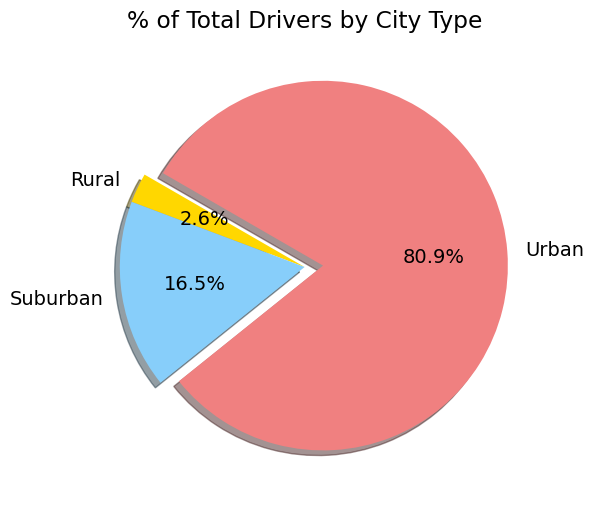

In [32]:
plt.subplots(figsize=(10, 6))
plt.pie(driver_total_percentage, labels=['Rural', 'Suburban', 'Urban'], colors=['gold', 'lightskyblue','lightcoral'],
        explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type") 
mpl.rcParams['font.size'] = 14
plt.savefig("Analysis/Fig7.png")
plt.show()